In [1]:
import numpy as np
import pandas as pd
import joblib
import sklearn
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [3]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
profile = ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

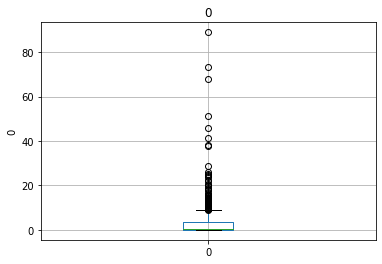

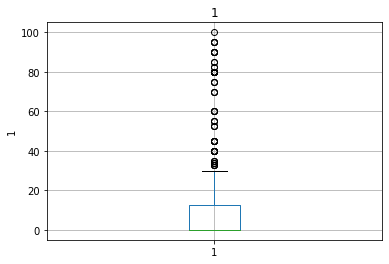

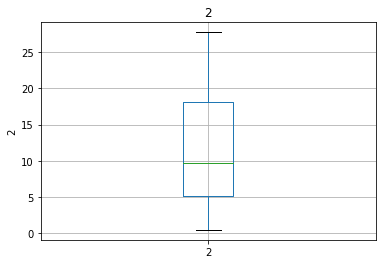

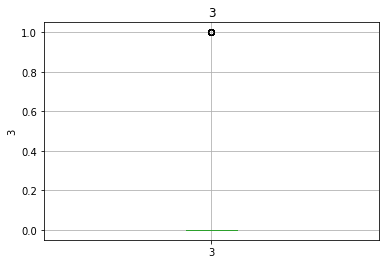

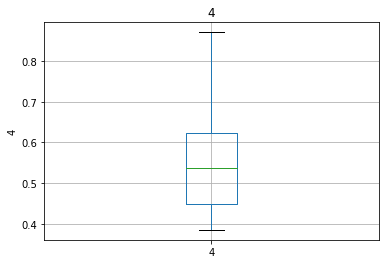

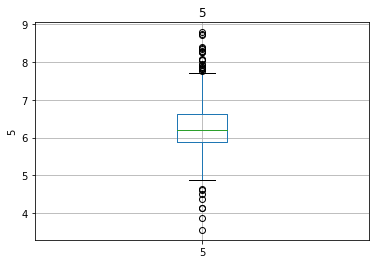

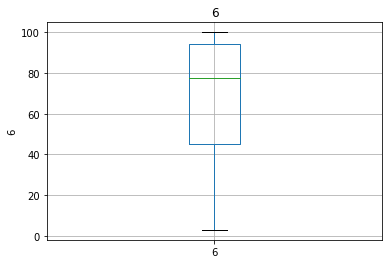

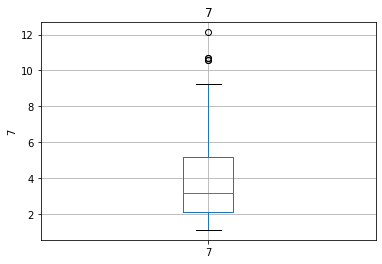

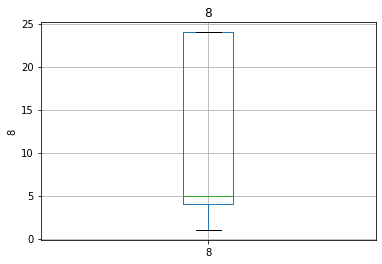

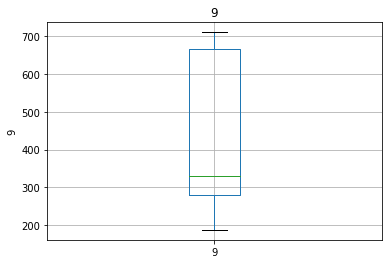

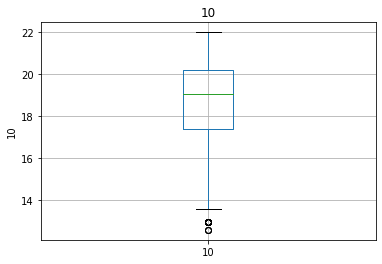

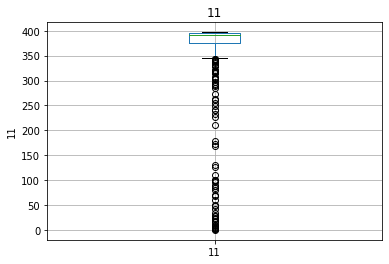

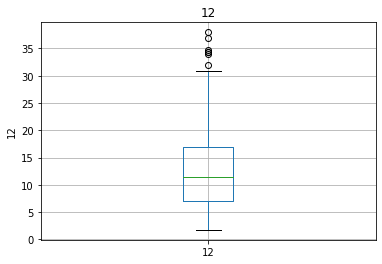

In [6]:
for feature in df.columns:
    data=df.copy()
    data[feature]=data[feature]
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [7]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [8]:
outliers_column=[]
for feature in df.columns[:-1]:
    sample_outliers = detect_outliers_iqr(df[feature])
    if len(sample_outliers)>0:
        print(f"{feature}", len(sample_outliers))
        outliers_column.append(feature)

0 66
1 68
3 35
5 30
7 5
10 15
11 77


In [9]:
for feature in outliers_column:
    twentith_percentile = np.percentile(df[feature], 20)
    eighttieth_percentile = np.percentile(df[feature], 80)
    df.loc[df[feature]<twentith_percentile,feature]=twentith_percentile
    df.loc[df[feature]>eighttieth_percentile,feature]=eighttieth_percentile

In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(df.drop("12",axis=1),df["12"], test_size=0.10,random_state=101)
print('Total number of training samples: '+str(len(X_train)))
print('Total number of testing samples: '+str(len(X_test)))

Total number of training samples: 455
Total number of testing samples: 51


In [11]:
scaling_columns=list(X_train.columns)
scaling_columns.remove("3")

In [12]:
scaler=StandardScaler()
X_train[scaling_columns] = scaler.fit_transform(
    X_train[scaling_columns])
X_train.describe()
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])

In [13]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_train_pred = Lr.predict(X_train)
y_test_pred = Lr.predict(X_test)
train_acc = r2_score(y_train, y_train_pred)
test_acc = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Train Accuracy : {train_acc}")
print(f"Test Accuracy : {test_acc}")
print(f"Train root mean squared error: : {train_rmse}")
print(f"Test root mean squared error: : {test_rmse}")
print(f"Difference in train and test Accuracy : {abs(train_acc-test_acc)}")

Train Accuracy : 0.6281371061818631
Test Accuracy : 0.6547699177984503
Train root mean squared error: : 4.320840098170213
Test root mean squared error: : 4.33128933805577
Difference in train and test Accuracy : 0.02663281161658715
